# Dogs vs Cats
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

## Data set:
- [kaggle](https://www.kaggle.com/c/dogs-vs-cats/data)
- Imágenes de perros y gatos
- Distintos tamaños
- Originalmente 25000 imágenes de perros y gatos (12.500 + 12500)
- Reducido a 2000 (1000+1000)
- 400 adicionales para testing

# Entendiendo el ImageDataGenerator

In [128]:
import numpy as np

In [114]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img_width=150
img_height=150
datagen_try = ImageDataGenerator(rescale=1. / 255)

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


Found 4 images belonging to 2 classes.


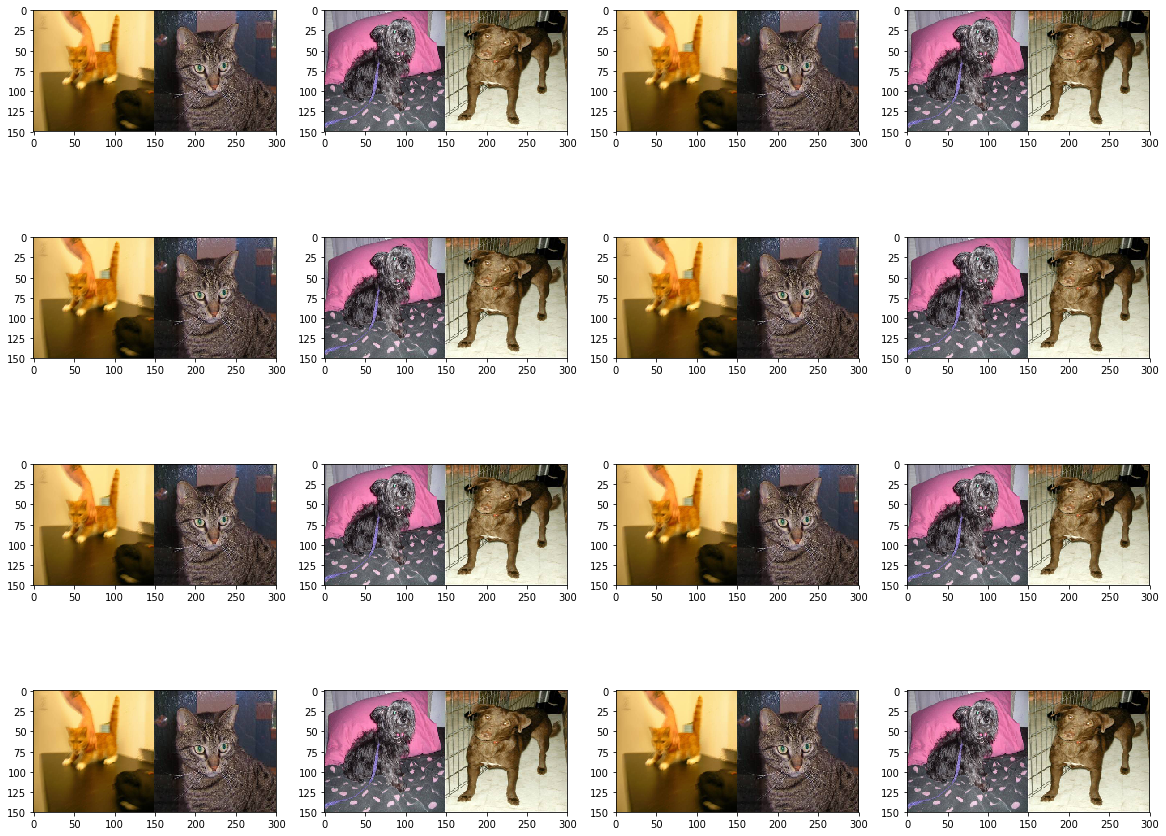

In [150]:
generator_tries = datagen_try.flow_from_directory(
        'data/try',
        target_size=(img_width, img_height),
        batch_size=2,
        class_mode=None,
        shuffle=False)
i = 0
f, axarr = plt.subplots(4, 4, figsize=(20,16))
ax = axarr.flatten()
for batch in generator_tries:
    #print(batch.shape, np.hstack((bat for bat in batch)).shape)
    ax[i].imshow(np.hstack((bat for bat in batch)))
    i += 1
    if i >= 16:
        break
plt.show()

In [151]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

def get_simple_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model
model = get_simple_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_19 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 64)        18496     
__________

# Sin augmentation

In [157]:
batch_size = 16

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = test_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [158]:
model = get_simple_model()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [159]:
history_0 = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

Epoch 1/50
125/125 [==============================] - 11s - loss: 0.7024 - acc: 0.5340 - val_loss: 0.6528 - val_acc: 0.5563
Epoch 2/50
125/125 [==============================] - 11s - loss: 0.6414 - acc: 0.6500 - val_loss: 0.6424 - val_acc: 0.6250
Epoch 3/50
125/125 [==============================] - 11s - loss: 0.5809 - acc: 0.6875 - val_loss: 0.8386 - val_acc: 0.6188
Epoch 4/50
125/125 [==============================] - 9s - loss: 0.5327 - acc: 0.7440 - val_loss: 0.5759 - val_acc: 0.7200
Epoch 5/50
125/125 [==============================] - 9s - loss: 0.4867 - acc: 0.7670 - val_loss: 0.5641 - val_acc: 0.7113
Epoch 6/50
125/125 [==============================] - 9s - loss: 0.4194 - acc: 0.8125 - val_loss: 0.5514 - val_acc: 0.7400
Epoch 7/50
125/125 [==============================] - 8s - loss: 0.3824 - acc: 0.8305 - val_loss: 0.5959 - val_acc: 0.7388
Epoch 8/50
125/125 [==============================] - 8s - loss: 0.3296 - acc: 0.8600 - val_loss: 0.6865 - val_acc: 0.7150 - loss: 0.329

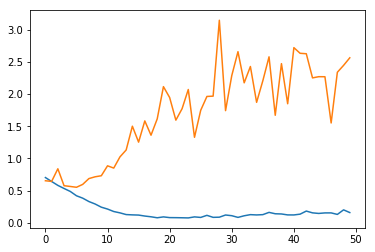

In [161]:
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.show()

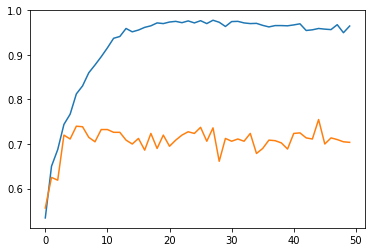

In [162]:
plt.plot(history_0.history['acc'])
plt.plot(history_0.history['val_acc'])
plt.show()

# Con augmentation

In [168]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [169]:
model = get_simple_model()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [170]:
history_1 = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

Epoch 1/50
125/125 [==============================] - 18s - loss: 0.7031 - acc: 0.5190 - val_loss: 0.6829 - val_acc: 0.5663
Epoch 2/50
125/125 [==============================] - 17s - loss: 0.6689 - acc: 0.6145 - val_loss: 0.6120 - val_acc: 0.6550
Epoch 3/50
125/125 [==============================] - 20s - loss: 0.6362 - acc: 0.6510 - val_loss: 0.6244 - val_acc: 0.6225
Epoch 4/50
125/125 [==============================] - 15s - loss: 0.6051 - acc: 0.6740 - val_loss: 0.5585 - val_acc: 0.7025
Epoch 5/50
125/125 [==============================] - 20s - loss: 0.5925 - acc: 0.6940 - val_loss: 0.5694 - val_acc: 0.6925
Epoch 6/50
125/125 [==============================] - 18s - loss: 0.5591 - acc: 0.7145 - val_loss: 0.5514 - val_acc: 0.7212
Epoch 7/50
125/125 [==============================] - 19s - loss: 0.5525 - acc: 0.7245 - val_loss: 0.5829 - val_acc: 0.6787
Epoch 8/50
125/125 [==============================] - 18s - loss: 0.5418 - acc: 0.7340 - val_loss: 0.5452 - val_acc: 0.7013
Epoch 9/

In [172]:
model.save_weights('first_try_augmentation.h5') 

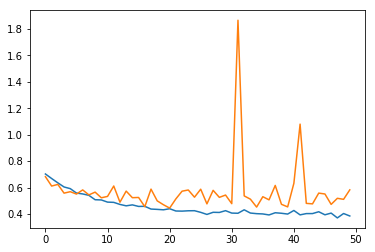

In [173]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.show()

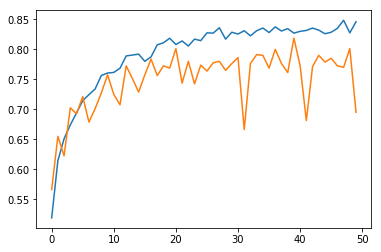

In [174]:
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.show()

In [175]:
flow_test = test_datagen.flow_from_directory('data/test',  target_size=(150, 150),  batch_size=batch_size,class_mode='binary')
model.evaluate_generator(flow_test,5)

Found 800 images belonging to 2 classes.


[0.57960160374641423, 0.63749999999999996]

In [176]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from fnn_helper import PlotLosses

https://keras.io/preprocessing/image/

# Usando Transfer learning

In [177]:
# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# Cargar VGG16

In [178]:
datagen = ImageDataGenerator(rescale=1. / 255)
# build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

# Genero Training

In [179]:
generator_training = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

Found 2000 images belonging to 2 classes.


In [180]:
# Guardo Training
bottleneck_features_train = model.predict_generator(
        generator_training, nb_train_samples // batch_size)
np.save('bottleneck_features_train.npy',bottleneck_features_train)

# Genero Validation

In [181]:
generator_validation = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

Found 800 images belonging to 2 classes.


In [182]:
bottleneck_features_validation = model.predict_generator(
        generator_validation, nb_validation_samples // batch_size)
np.save('bottleneck_features_validation.npy', bottleneck_features_validation)

# Entreno Red Pequeña

## Cargo features y labels

In [183]:
train_data = np.load('bottleneck_features_train.npy')
train_labels = np.array([0] * int(nb_train_samples / 2) + [1] * int(nb_train_samples / 2))

validation_data = np.load('bottleneck_features_validation.npy')
validation_labels = np.array([0] * int(nb_validation_samples / 2) + [1] * int(nb_validation_samples / 2))

In [184]:
train_data.shape[1:]

(4, 4, 512)

In [188]:
def get_top_model():
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [189]:
model = get_top_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


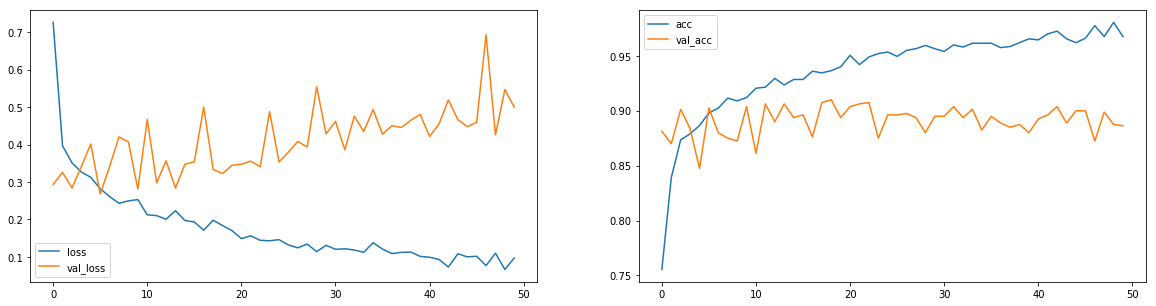

2000/2000 [==============================] - 1s - loss: 0.0972 - acc: 0.9675 - val_loss: 0.4998 - val_acc: 0.8862


In [190]:
model = get_top_model()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None, 
                         x_val=validation_data, y_val_categorical=validation_labels)
model.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels),
         callbacks=[plot_losses])
model.save_weights(top_model_weights_path)

# Fine Tunning

In [221]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense

In [222]:
# path to the model weights files.
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [223]:
# build the VGG16 network
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
print(base_model.summary())

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
# model.add(top_model)
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [224]:
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:15]:
    print(layer.name)
    layer.trainable = False
model.layers[15].name

input_12
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool


'block5_conv1'

In [225]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
history_3 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=1)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 20s - loss: 0.3299 - acc: 0.8895 - val_loss: 0.2987 - val_acc: 0.9075
Epoch 2/50
125/125 [==============================] - 17s - loss: 0.2108 - acc: 0.9255 - val_loss: 0.2401 - val_acc: 0.9263
Epoch 3/50
125/125 [==============================] - 15s - loss: 0.1636 - acc: 0.9460 - val_loss: 0.3452 - val_acc: 0.8975
Epoch 4/50
125/125 [==============================] - 16s - loss: 0.1550 - acc: 0.9445 - val_loss: 0.2466 - val_acc: 0.9200
Epoch 5/50
125/125 [==============================] - 16s - loss: 0.1173 - acc: 0.9585 - val_loss: 0.3614 - val_acc: 0.8962
Epoch 6/50
125/125 [==============================] - 15s - loss: 0.1220 - acc: 0.9585 - val_loss: 0.2278 - val_acc: 0.9237
Epoch 7/50
125/125 [==============================] - 17s - loss: 0.0900 - acc: 0.9725 - val_loss: 0.3335 - val_acc: 0.9187
Epoch 8/50
125/125 [=============================

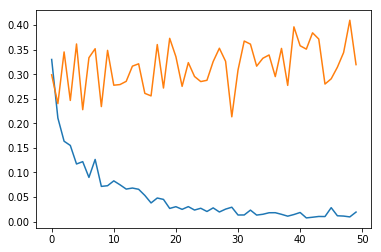

In [226]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.show()

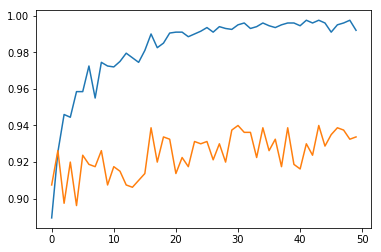

In [227]:
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.show()